<a href="https://colab.research.google.com/github/Sercan-dev/xgboost_churn_classification/blob/main/XGB_Churn_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco customer churn classification with XGBoost

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import  train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Display more columns
pd.options.display.max_columns = 100
# Display the whole tweet by maximizing columns width
pd.set_option('display.max_colwidth', None)

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.shape

(7043, 21)

Some of the columns only contain a single value, and will not be useful for classification. To check we use the df[''].unique

In [ ]:
df['SeniorCitizen'].unique()

array([0, 1])

In [ ]:
df.drop(['customerID'],
        axis=1, inplace=True) ## set axis=0 to remove rows, axis=1 to remove columns

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**NOTE:**Although it is ok to have withespace between names for XGBoost and classification, we can't have any withespace if we want to draw a tree. So let's take care of that by replacing the whitespace in the city name for example with an underscore

In [ ]:
df['Contract'].replace('-','_', regex=True, inplace=True )
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month_to_month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month_to_month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month_to_month,Yes,Electronic check,70.70,151.65,Yes


# Missing data part 1: Identifying missing data

Unfortunately the biggest part of any data analysis project is making sure that the data are correctly formatted and fixing it when it is not. The first part of this process is Identifying missing data.

**Missing data** is simply a blank space,Or a surrogate value light **NA**, That indicates that we Failed to collect Data for one of The features.For example, If you forgot to ask someone's age, or forgot to write it down, then we would have blank space in the dataset for that person's **age**.

One thing is that is relatively unique about **XGBoost** Is that it has Default behavior for missing data. So all we have to do is that identify missing values add make sure they are all set to 0.

In this section, We will focus on identifying missing values in the dataset.

First, Let's see what sort of data is in each column.


In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

# Missing Data Part 2: Dealing with missing Data, XGBoost style

One thing that is relatively unique about **XGBoost** Is that it determines default behavior for missing data. So all we have to do is identify missing values and make sure they are set to 0.

However before we do that,Let's see how many rows are missing data.If it's a lot,Then we might have a problem on our hands that is bigger then what **XGBoost** can deal with on its own.If it's not that many,We can just set them 0.

In [ ]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#find empty string spaces
np.where(df.applymap(lambda x: x == ' '))

(array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]),
 array([18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18]))

In [ ]:
len(df.loc[df['TotalCharges']==' '])

11

Since only 11 rows have missing values, et's look at them

In [ ]:
df.loc[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


We see that 11 people with TotalCharges == ' ' have just signed up, because Tenure is 0. These people also all have churn_Value set to 0 because they just signed up. So we have few choices here, we can set TotalCharges to 0 for these 11 people or we can remove them. In this example, we'll try setting TotalCharges to 0

In [ ]:
df.loc[(df['TotalCharges'] == ' '), 'TotalCharges'] = 0

Now let's verify that we modified TotalCharges correctly by looking at everyone who had Tenure set to 0.

In [ ]:
df.loc[df['tenure'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,No


In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We have verified that df contains 0s instead of ' 's for missing values.**NOTE: TotalCharges** still has the object data type. That is no good because **XGBoost** only allows int, float or boolean data types. We can fix this by converting it with to_numeric().

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
# Change Churn values from yes and no to 1 and 0
 
df['Churn'].replace(('Yes', 'No'), (1, 0), inplace=True)
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month_to_month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month_to_month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month_to_month,Yes,Electronic check,70.70,151.65,1


# Format Data Part 1: Split the data into Dependant and Independent Variables

Now that we have taken care of the missing data , we are ready to start formatting the date for making an **XGBoost** model.

The first step is to split the data into two parts:

> 1.The columns of the data that we will use to make classifications.

> 2.The columns of data that we want to predict.

We will use the conventional notation of X (capital X) to represent the columns of data we will use to make classifications and y (lower case y) to represent the thing we want to predict. In this case, we want to predict **Churn Value** (whether or not someone will leave the company).

The reason we deal with missing data before splitting it to **X** and **y** is that if we remove rows, splitting after ensures that each row in **X** correctly corresponds with the appropiate value in **y**.

**NOTE:** in the code below we are using copy() to copy the data by values. By default, pandas uses copy by reference.
Using copy() ensures that the original data df_no_missing is not modified when we modify X or y. In other words, if we make a mistake when we are formatting the columns for classification trees, we can just re-copy df_no_missing,
rather than have to reload the original data and remove the missing values etc.



In [ ]:
X = df.drop('Churn', axis=1).copy() # alternatively: X = df_no_missing.iloc[:,:-1]
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month_to_month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month_to_month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month_to_month,Yes,Electronic check,70.70,151.65


In [ ]:
y = df['Churn'].copy()
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

Now that we have created X, which has the data we want to use to make predictions, and y, which has the data we want to predict, we are ready to continue formatting X so that it is suitable for making a model with XGBoost 

In [ ]:
X.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

# Format the Data Part2: One-Hot Encoding

So, we see that **MontlyCharges, TotalCharges** are all float64, which is good, because we want them to be floating point numbers. All of the columns that are object type, however need to be inspected to make sure they only contain reasonable values, and most, if not all of the, will need to change. This is because,while XGBoost natively supports continuoud data, like **MonthlyCharges** etc. it does not natively support categorical data,like PhoneService, which contains 2 different categories. Thus, in order to use categorical dat awith XGBoost, we have to use a trick that converts a column of categorical data into muliple columns of binary values. This trick is called** One_Hot Encoding**

At this point you may wondering, 'what's wrong with treating categorical data like continious data?' To answer that question, let's look at an example:For the PaymentMethod column, we have a bunch of options:


> 1.Mailed_check

> 2.Electonic_check

> 3.Bank_Transfer

> 4.Credit_card

If we convert these categories to numbers, 1,2,3,4, treat them like continious data, then we would assume that 4,
which means **Credit_card**, is more similar to 3, which means **Bank_transfer**, than it is to 1 or 2. That means the XGBoost Would beTo Cluster peeple with 4s and 3s together then the people with 4s and 1s together. In contrast,If we treat thes **Payment_methods** Like categorical data, then we treat each one as Separate category that is no more a less similar to Any of the other categories.Thus, the Likelihood of clustering people pay with a Mailed_Check With people pay with Electronic_check Is the same as clustering Mailed_ckeck with Credit_card, and that approach is more reasonable.











**NOTE:**There are many different ways to do One hot Encoding in Python. Of the more popular methods are **ColumnTransformer()** from Scikit-learn and **get_dummies()** from pandas, And both my thoughts have pros and cons.**ColumnTransformer()** As a very cool feature where it creates a persistent function that can validate data that you get in the future. For example, if you build your XGBoost model using a categorical variable **favorite color** that has red, blue and green options, then ColumnTranformer() can remember those options and later on when your XGBoost model is being used in a production system, if someone says their favorite color is **Orange**, then **ColumnTransformer()** can throw  an error or handle the situation in some other nice way. The downside of **ColumnTransformer()** is that it turns your data into an array an loses all of the column names, making it harder to verify that your usage of **ColumnTransformer()**worked as you intended it to. In contrast, **get_dummies()** leaves your data in a dataframe and retains the column names, making it much easier to verify that it worked as intended. However, it does not have the persistent behavior that **ColumnTransformer()** has. So, for the sake of learning how **One-Hot Encoding** works, let's use **get_dummies()**. Howerver once you are comfortable with One-Hot Encoding, you should consider investigating using **ColumnTransformer()**.

First, lets just see what happens when we convert **PaymentMethod** without saving the results. This will make it easy to see how **get_dummies()** works.

In [ ]:
pd.get_dummies(X, columns=['PaymentMethod']).head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month_to_month,Yes,29.85,29.85,0,0,1,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.50,0,0,0,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month_to_month,Yes,53.85,108.15,0,0,0,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75,1,0,0,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month_to_month,Yes,70.70,151.65,0,0,1,0


As we can see above, get_dummies() puts all of the columns it does not process in the front and it puts the values for **PaymentMethod** at the end. **1 ** for any person that paid by that way and **0** for everyone else.

Now let's use it on all of the categorical columns ans save the result.

**NOTE:** in a real situation(not a Tutorial like this), you should verify all of those columns to make sure they only contain the accepted categories.

In [ ]:
X_encoded = pd.get_dummies(X, columns=['gender',
                                       'Partner',
                                       'Dependents',
                                       'PhoneService',
                                       'MultipleLines',
                                       'InternetService',
                                       'OnlineSecurity',
                                       'OnlineBackup',
                                       'DeviceProtection',
                                       'TechSupport',
                                       'StreamingTV',
                                       'StreamingMovies',
                                       'Contract',
                                       'PaperlessBilling',
                                       'PaymentMethod'])
X_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month_to_month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [ ]:
y.unique()

array([0, 1])

# Build a preliminary XGBoost Model

At long last, the data is correctly formatted for making an XGBoost model. Now we simply split the data into training and testing sets and build the model. However, first let's observe that this data is imbalanced by dividing the number of people who left the company, where y = 1, by the total number of people in the dataset.

In [ ]:
sum(y)/len(y)

0.2653698707936959

So we see that **27%** of the people in the dataset left the companx.Because of this, when we split the data into **Traning** and **Testing**,we will split using statification in order to maintain the same percentage of people who left the company in both the training and the testing set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y, random_state=42, stratify=y)

In [ ]:
sum(y_train)/len(y_train)

0.2654297614539947

In [ ]:
sum(y_test)/len(y_test)

0.26519023282226006

stratify worked as expected and both y_train and y_test have the same percentage of people that left the company. Now let's build the preliminary model.


**NOTE:**Instead of determining the optimal number of trees with cross validation, we will use early stopping to stop building trees when they no longer improve the situation.

In [ ]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42)
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.579067
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.581273
[2]	validation_0-aucpr:0.594607
[3]	validation_0-aucpr:0.595215
[4]	validation_0-aucpr:0.596482
[5]	validation_0-aucpr:0.598574
[6]	validation_0-aucpr:0.631769
[7]	validation_0-aucpr:0.638008
[8]	validation_0-aucpr:0.638729
[9]	validation_0-aucpr:0.63937
[10]	validation_0-aucpr:0.63839
[11]	validation_0-aucpr:0.641466
[12]	validation_0-aucpr:0.641945
[13]	validation_0-aucpr:0.641556
[14]	validation_0-aucpr:0.640274
[15]	validation_0-aucpr:0.64372
[16]	validation_0-aucpr:0.645566
[17]	validation_0-aucpr:0.645732
[18]	validation_0-aucpr:0.647367
[19]	validation_0-aucpr:0.64633
[20]	validation_0-aucpr:0.647219
[21]	validation_0-aucpr:0.647022
[22]	validation_0-aucpr:0.647085
[23]	validation_0-aucpr:0.649197
[24]	validation_0-aucpr:0.650565
[25]	validation_0-aucpr:0.649892
[26]	validation_0-aucpr:0.649925
[27]	validation_0-aucpr:0.649745
[28]	validation_0-aucpr:

XGBClassifier(seed=42)

Ok, we've built an XGBoost model for classification. Let's see it performs on the TEsting Dataset by running the Testing dataset down the modeland drawing a Confusion Matrix.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


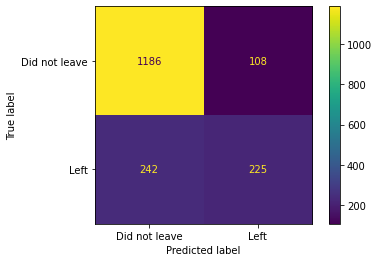

In [ ]:
plot_confusion_matrix(clf_xgb,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=['Did not leave', 'Left'])

In the confusion matrix, we see that of the 1294 people that did not leave, 1186(91,6%) were correctly classfied. And of the 467 people left the company, 225 were correctly classified. So the XGB model was not awsome. Part of the problem is the imbalance. The good news is that XGBoost has a parameter, **scale_pros_weight** ,thathelps with the imbalanced data. So lets try to improve predictions using Cross Validation to optimize the parameters.

# Optimize Parameters using Cross Validation and GridSearch(),

**XGBoost** has a lot of hyperparameters, parameters that we have to manual confirure and not determined by XGBoost itself, including `max_depth`, the maximum tree depth, `learning_rate`, the learning rate, or "eta", `gamma`, the parameter that encourages pruning, and `reg_lambda`, the regularization parameter lambda. So Lets try to find the optimalvalues for these hyperparameters in hopes that we can improve the accuracy with the **Testing Dataset**.

**NOTE:** Since we have many hyperparameters to optimize, we will use `GridSearch()` tests all possible combinations of the parameters for us.




In [ ]:
## NOTE: When data are imbalanced, the XGBoost manual says: Use AUC for evaluation


##ROUND 1

#param_grid = {
#    'max_depth': [3, 4, 5],
#    'learning_rate': [0.1, 0.01, 0.05],
#    'gamma': [0, 0.25, 1.0],
#    'reg_lambda': [0, 1.0, 10.0],
#    'scale_pos_weight': [1, 3, 5] #NOTE: XGBoost recomends sum(negative instances) / sum(positiv)
#}

## Output max_depth: 4 , learning_rate: 0.1, gamma: 0.25, reg_lambda: 10, scale_pos_weight: 3
## Because learning_rate an reg_lambda were at ends of their range, we will continue to explore



In [ ]:

##ROUND 2

#param_grid = {
#    'max_depth': [4],
#    'learning_rate': [0.1, 0.5, 1],
#    'gamma': [0.25],
#    'reg_lambda': [10.0, 20, 100],
#    'scale_pos_weight': [3]
#}

## Output max_depth: 4 , learning_rate: 0.1, reg_lambda: 10

In [ ]:
## NOTE: To speed up cross validation, and to further prevent overfitting.
## We are only using random subset of the data (90%) and are only
## using a random subset of the features (50%) per tree.

#optimal_params = GridSearchCV(
#    estimator=xgbClassifier(objective='binary:logistic',
#                            seed=42,
#                            subsample=0.9,
#                            colsample_bytree=0.5),
#    param_grid=param_grid,
#    scoring='roc_auc',
#    verbose=0, #Note if you want to see what Grid Search is doing set verbose=2
#    n_jobs = 10
#    cv= 3
#)

So, after testing all possible combinations of the potential parameter values with **Cross Validation**, we see we should set gamma=0.25, learn_rate=0.1, max_depth=4, and reg_lambda=10.

# Builing, Evaluating, Drwaing, and Interpreting the optimized XGBoost Model

In [ ]:
clf_xgb = xgb.XGBClassifier(seed=42,
                            objective='binary:logistic',
                            gamma=0.25,
                            learn_rate=0.1,
                            max_depth=4,
                            reg_lambda=10,
                            scale_pos_weight=3,
                            subsample=0.9,
                            colsample_bytree=0.5)

clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.589704
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.59513
[2]	validation_0-aucpr:0.59829
[3]	validation_0-aucpr:0.605557
[4]	validation_0-aucpr:0.61095
[5]	validation_0-aucpr:0.607609
[6]	validation_0-aucpr:0.612199
[7]	validation_0-aucpr:0.617342
[8]	validation_0-aucpr:0.646941
[9]	validation_0-aucpr:0.647703
[10]	validation_0-aucpr:0.645419
[11]	validation_0-aucpr:0.645227
[12]	validation_0-aucpr:0.6475
[13]	validation_0-aucpr:0.646127
[14]	validation_0-aucpr:0.647206
[15]	validation_0-aucpr:0.646435
[16]	validation_0-aucpr:0.645728
[17]	validation_0-aucpr:0.647645
[18]	validation_0-aucpr:0.646567
[19]	validation_0-aucpr:0.648755
[20]	validation_0-aucpr:0.648068
[21]	validation_0-aucpr:0.649836
[22]	validation_0-aucpr:0.651604
[23]	validation_0-aucpr:0.65213
[24]	validation_0-aucpr:0.650754
[25]	validation_0-aucpr:0.652219
[26]	validation_0-aucpr:0.652234
[27]	validation_0-aucpr:0.652319
[28]	validation_0-aucpr:0.

XGBClassifier(colsample_bytree=0.5, gamma=0.25, learn_rate=0.1, max_depth=4,
              reg_lambda=10, scale_pos_weight=3, seed=42, subsample=0.9)

now let's plot the confusion matrix to see if the optimized XGB model does better

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


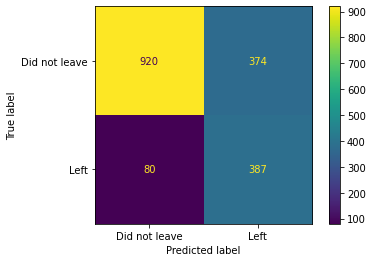

In [ ]:
plot_confusion_matrix(clf_xgb,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=['Did not leave', 'Left'])

We see that the optimized model is a lot better at identifieng people that left the company. Of the 467 people left, 387(82.8%), were correctly identified compared to the bevore optimized model with only 48.1%. However this improvment was at the expense of not being able to classify the as many people that did not leave. 

In the end this trade off may be better for the company because now it can allocate it's resources to those people who are most likely to leave and try to retain them with special offers or gift cards.